# Bikeshop Binary Data Modelling
## Executive Summary of this Business Case
Our bicycle company are experiencing a stagnant growth due to inefficient and uneffective marketing. We wanted to help this by exploring our visitors data to learn more about customers characteristics that may have higher propensity to buy a bike. Therefore, using Python, I analyzes the datasets and create a sophisticated model to increase growth.

## Project Personal Purpose & Reasons on why I chose this datasets.
During my bachelor I had a hard time on applying all the abstract theoritical concepts from my notebook. I felt I wasted so many time studying but I never apply anything in the real world.
As I am doing my master currently in business analytics, I feel projects is a way on applying insantly what we learned in the programme that helps me creates strong foundation and immerse more on the materials.
Therefore, in this project I will demonstrate a **Exploratory Data Analaysis** to improve managerial decision making.

The reason why I chose this datasets is since I am living in the Netherlands currently, everyone bike here. Whether you are old or young, married or single, no matter your ethnicity and race you are kinda controlled by this invisible hand to get around with a bicycle. This sparks an interest of me to explore any characteristics correlation.

## Goal
To learn customer behaviour based on their characteristics to see who have higher propensity to buy a bike that may help the business understand the customer more such as marketing departments on target marketing on customer that has higher propensity to buy, creating ads that targeted into that specific customer group.

## Deliverables
Data Dictionary

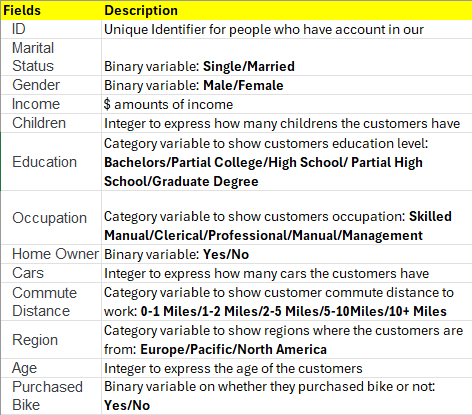

## Results and Business Recommendation
Starting with our continuous variables that have a notable correlation with the purchased bike shows that *Children, Car* and *Age* has a negative correlation with propensity of buying bicycle. This can indicate people who are having more children are more likely to use a car as it is more easier for them. Car variable on the other hand might shows people who have car are less likely to buy a bicycle as car is more convenient for their mobility purposes. Lastly, Age negative association is logical as people who are older has lower physical capabilities to bike. In our categorical variables, we can see that *Education, Commute* and *Region* has a notable Cramers'V values with respect to the willingness of buying a bicycle that implies a strong relationship between categorical variables and our dependent variables. Education may due to educated people are more likely to be aware of the positive environmental impact of biking compared to car, thus, driving up this reationship. Commute might due to people who are likely need to travel far to the office are less likely to bike. Lastly, region of where our customers might drive up the willingness to bike with reason such as the cycling infrastructure, the awareness of the society, and many more region factors. Looking the problem from a business perspective, we know understand more of the characteristics people who have a higher willingness to buy this item such as, a higher education level, lower commute range to work, small amount of childrens, does not have a car, young age, and live in Europe region.

Therefore, from understanding this customer characteristics, we can do a lot of things for our event campaign. For example, we can partner up with business to supply them bikes for their employees who live closer. We can offer big discount for students, and many more. The caveats however, we dont know how worth it is as people that have a higher propensity to buy might still buy with or without the discount, while people who are not in this characteristics may benefit more, and therefore it is more beneficial to target them instead. This is a field where not discussed, however, this analysis can be implemented in that way with using tools from causal inferences, such as directed acyclic graph, or any other tools that can used to isolate the effect of this characteristics to its propensity of buying a bike.










# Python Libraries

In [154]:
#Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [155]:
#Importing Data
path = kagglehub.dataset_download("heeraldedhia/bike-buyers")
print("Path to dataset files:", path)
df = pd.read_csv(path + '/bike_buyers.csv')

Path to dataset files: C:\Users\adaml\.cache\kagglehub\datasets\heeraldedhia\bike-buyers\versions\2


# Data Cleaning

### Data Dictionary

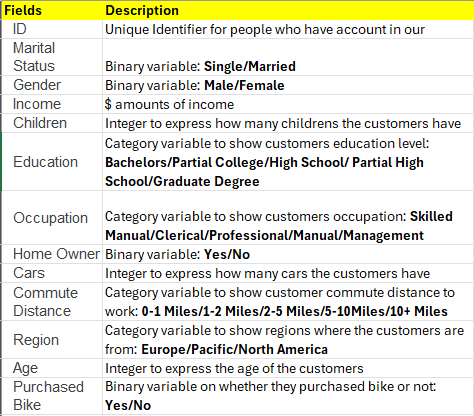

In [167]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Purchased Bike Dummy
0,12496,Married,Female,-0.515853,-0.554534,Bachelors,Skilled Manual,Yes,-1.307144,0-1 Miles,Europe,-0.197537,No,0
1,24107,Married,Male,-0.840219,0.680358,Partial College,Clerical,Yes,-0.407360,0-1 Miles,Europe,-0.109988,No,0
2,14177,Married,Male,0.781615,1.915250,Partial College,Professional,No,0.492424,2-5 Miles,Europe,1.378346,No,0
4,25597,Single,Male,-0.840219,-1.171980,Bachelors,Clerical,No,-1.307144,0-1 Miles,Europe,-0.722832,Yes,1
5,13507,Married,Female,-1.488953,0.062912,Partial College,Manual,Yes,-1.307144,1-2 Miles,Europe,0.502855,No,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    952 non-null    int64  
 1   Marital Status        952 non-null    object 
 2   Gender                952 non-null    object 
 3   Income                952 non-null    float64
 4   Children              952 non-null    float64
 5   Education             952 non-null    object 
 6   Occupation            952 non-null    object 
 7   Home Owner            952 non-null    object 
 8   Cars                  952 non-null    float64
 9   Commute Distance      952 non-null    object 
 10  Region                952 non-null    object 
 11  Age                   952 non-null    float64
 12  Purchased Bike        952 non-null    object 
 13  Purchased Bike Dummy  952 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 111.6+ KB


### Cleaning #NA values

In [169]:
#Checking Null Values
df.isnull().sum()

ID                      0
Marital Status          0
Gender                  0
Income                  0
Children                0
Education               0
Occupation              0
Home Owner              0
Cars                    0
Commute Distance        0
Region                  0
Age                     0
Purchased Bike          0
Purchased Bike Dummy    0
dtype: int64

In [159]:
#Removing NAs values
df = df.dropna()

In [170]:
#Double Checking Null Values
df.isnull().sum()

ID                      0
Marital Status          0
Gender                  0
Income                  0
Children                0
Education               0
Occupation              0
Home Owner              0
Cars                    0
Commute Distance        0
Region                  0
Age                     0
Purchased Bike          0
Purchased Bike Dummy    0
dtype: int64

### Creating Dummy Variables, and Categorizing Variables

In [171]:
#Changing Purchased Bike into numerical values
df['Purchased Bike Dummy'] = df['Purchased Bike'].map({'Yes': 1, 'No': 0})

In [172]:
#Categorizing Columns
num_feats = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_feats.remove('ID')#Removing ID from the numerical features as it is not useful for analysis
num_feats.remove('Purchased Bike Dummy') #Removing the target variable from numerical features
nom_feats = []
bin_feats = []

for col in df.select_dtypes(include=['object']).columns: #Checking the number of objects to categorize as binary or nominal
    unique_vals = df[col].nunique()
    if unique_vals == 2:
        bin_feats.append(col)
    else:
        nom_feats.append(col)

cat_feats = nom_feats + bin_feats
cat_feats.append('Purchased Bike Dummy')
cat_feats.remove("Purchased Bike")
print("Numerical features:", num_feats)
print("Categorical (nominal) features:", nom_feats)
print("Binary features:", bin_feats)


Numerical features: ['Income', 'Children', 'Cars', 'Age']
Categorical (nominal) features: ['Education', 'Occupation', 'Commute Distance', 'Region']
Binary features: ['Marital Status', 'Gender', 'Home Owner', 'Purchased Bike']


In [173]:
#Checking the number of unique value per column
df.nunique()

ID                      952
Marital Status            2
Gender                    2
Income                   16
Children                  6
Education                 5
Occupation                5
Home Owner                2
Cars                      5
Commute Distance          5
Region                    3
Age                      52
Purchased Bike            2
Purchased Bike Dummy      2
dtype: int64

In [174]:
#Data frame Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,952.0,1.997994e+04,5334.000279,11000.000000,15310.250000,19747.500000,24531.500000,29447.000000
Income,952.0,4.478211e-17,1.000526,-1.488953,-0.840219,0.132881,0.457248,3.700918
Children,952.0,4.478211e-17,1.000526,-1.171980,-1.171980,0.062912,0.680358,1.915250
Cars,952.0,8.956421e-17,1.000526,-1.307144,-0.407360,-0.407360,0.492424,2.291992
Age,952.0,2.351061e-16,1.000526,-1.685872,-0.810381,-0.109988,0.677954,3.917270
Purchased Bike Dummy,952.0,4.789916e-01,0.499821,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Visualization

### Count Plot Purchased Bike
As we can see below, the distribution of our purchased bike is balanced, thus, we dont need to worry of imbalance in this sample dataset.

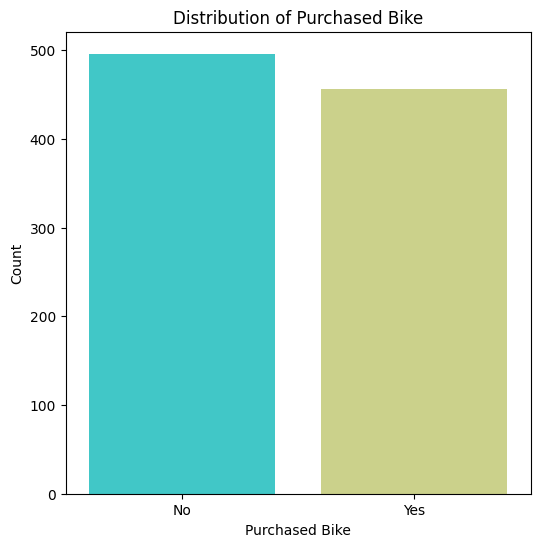

In [175]:
#Creating Count Plot to See Distribution of Purchased Bike
plt.figure(figsize=(6,6))
sns.countplot(x='Purchased Bike', data=df, palette='rainbow')
plt.title('Distribution of Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Count')
plt.show()


##

### Numerical Variables Density Plot

We compared the density between all numerical variables comparing people who purchased bike and not. From the distribution below, we can see that both have the same density, thus, we can relax the concern of imbalanceness.

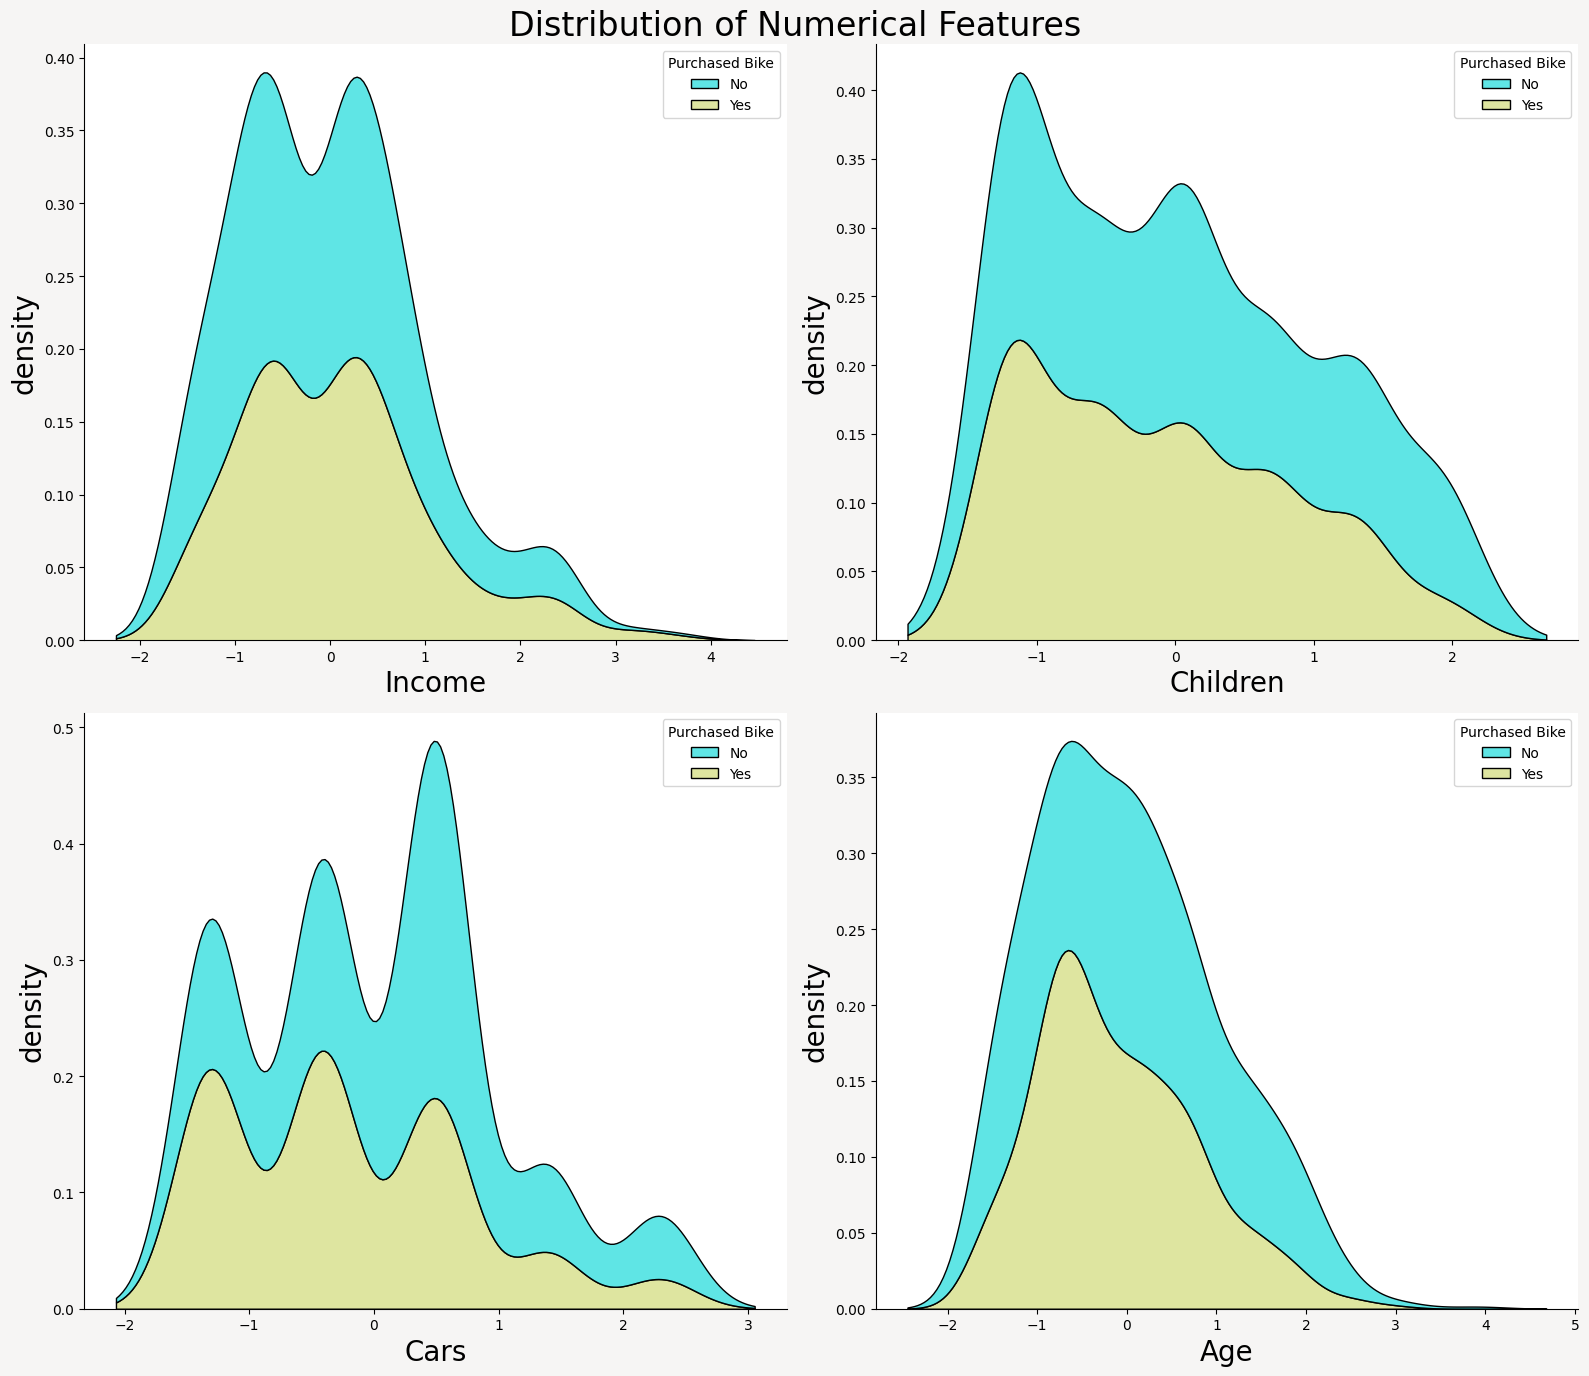

In [176]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(data=df, x=col, hue="Purchased Bike", multiple="stack", palette= 'rainbow')
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24)
plt.tight_layout() 

### Count Plot Categorical Featues Visualization

The figure below depicts the distribution of categorical variables between people who bought a bike ("Yes") and those who didn't ("No").  Overall, the charts demonstrate how demographic and lifestyle characteristics differ between the two groups.  Individuals with a Bachelor's or Partial College education dominate both groups, although those with Graduate Degrees are significantly more likely to own motorcycles.  Respondents who have only completed high school or a portion of high school appear to be less inclined to purchase a bike.  In terms of occupation, the Professional and Management categories have the most bike purchases, while Manual and Clerical workers are underrepresented.  Individuals who reside within 0-1 miles of their employment make up the largest commuter sector, and this group also has a higher proportion of bike purchasers than those who travel longer distances, notably beyond 10 miles.  Across regions, the majority of respondents are from North America, followed by Europe and the Pacific, with relatively similar purchase trends found, albeit North America has a somewhat higher proportion of buyers.  Marital status suggests that married people make up the majority of both groups, however the gap between purchasers and non-buyers is small.  Gender distribution appears to be generally balanced, implying that male and female bike purchasers behave similarly.  Finally, a sizable proportion of respondents are homeowners, and the proportions of bike purchasers and non-buyers are about equal.  Overall, the visualizations indicate that education, occupation, and commute distance may have a greater impact on the decision to buy a bike than gender or marital status, providing preliminary insights before doing the logistic regression study.

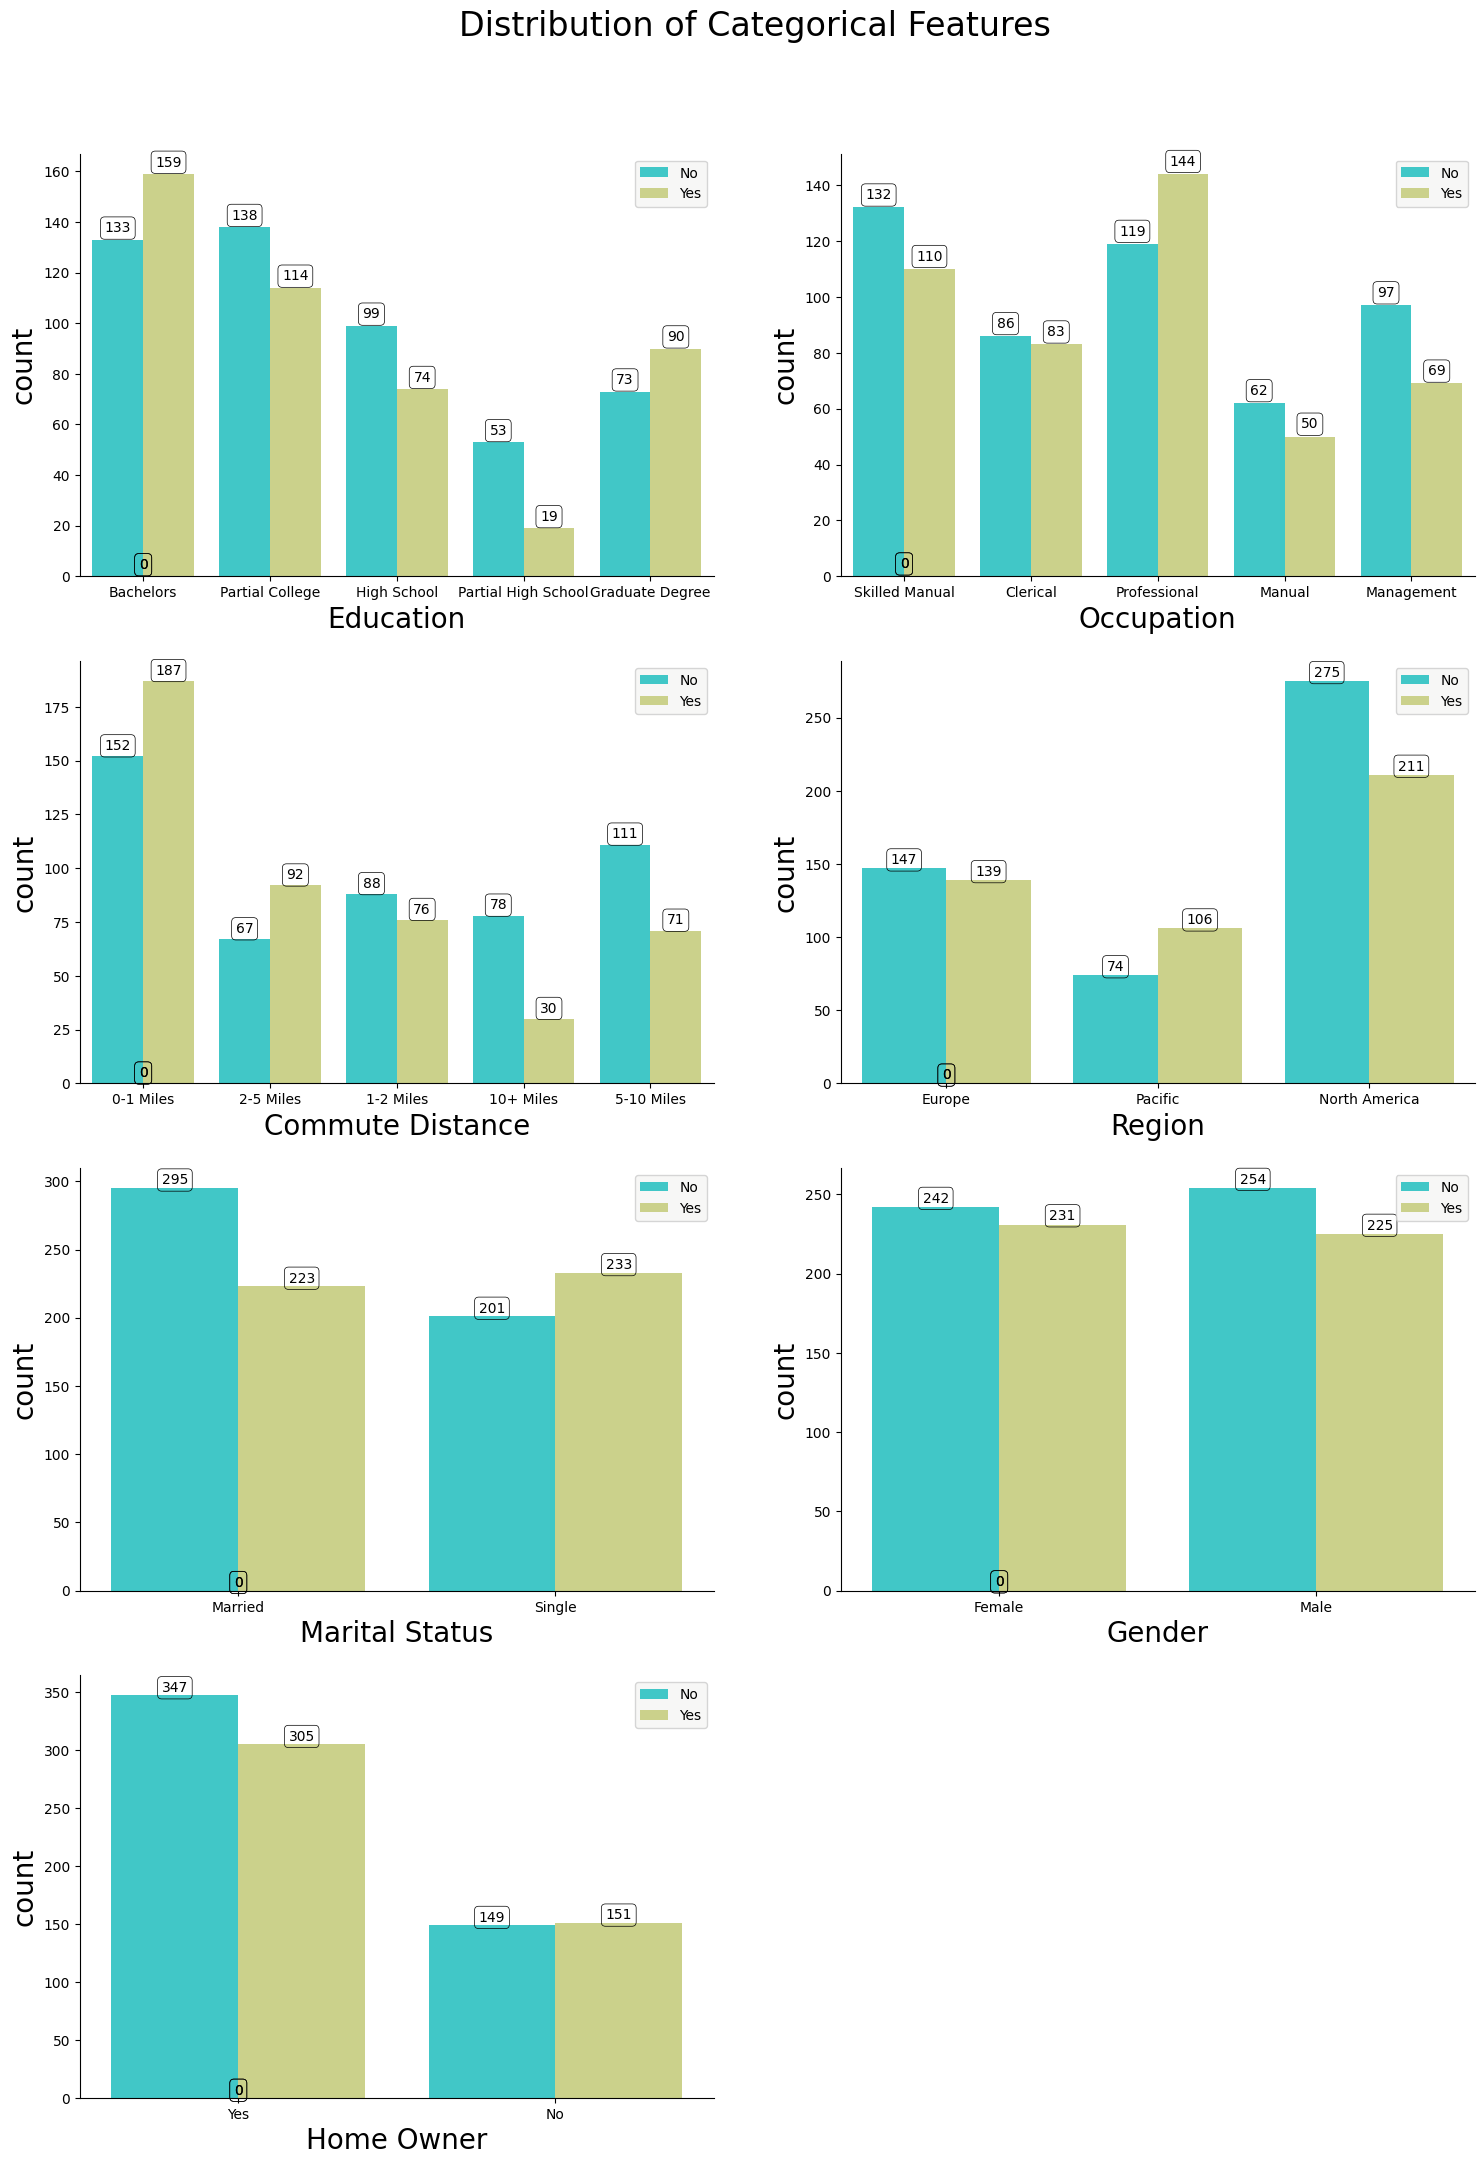

In [177]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24))    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i)
        ax = sns.countplot(data=df, x=col, hue="Purchased Bike", palette='rainbow')
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(df, cat_feats[0:-1]);

### Correlation Graph

#### Pearson Correlation of Numerical Features
Overall, the numerical features from graph below have moderate to weak positive correlations with one another, indicating little multicollinearity.  The strongest correlation is found between Age and Children (r = 0.54), showing that older people have more children.  There is also a moderate positive association between income and cars (r = 0.43), indicating that people with greater incomes are more likely to own more cars.  The remaining relationships—such as Income and Children (r = 0.26), Children and Cars (r = 0.27), Income and Age (r = 0.18), and Cars and Age (r = 0.19)—are rather weak, implying that these variables vary independently of one another.

 In summary, while there is some positive link between these characteristics, none of the correlations are extremely high, implying that multicollinearity will not be a major worry for the next logistic regression model predicting bike purchases.

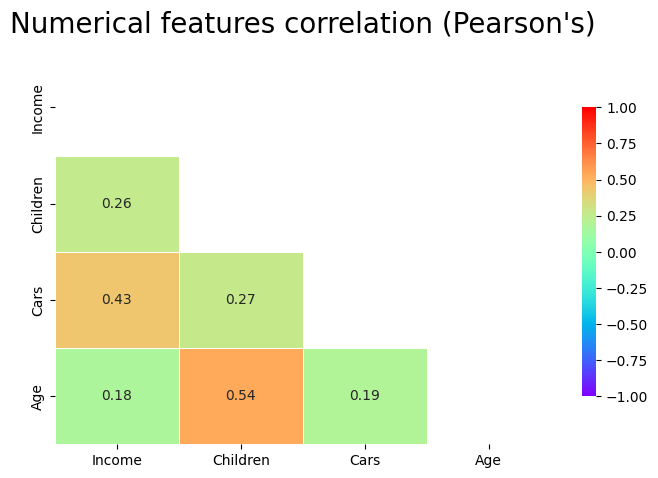

In [107]:
df_ = df[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette('rainbow', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

#### Bi-Serial Correlation Heatmap with Dependent Binary Variable
The heatmap above depicts the association between continuous factors and the goal variable, Purchased Bike Dummy, using Point-Biserial correlation coefficients, which measure the relationship with a binary variable (bike purchase) and continuous predictors.

 The correlations show that there is a modest association between most numerical variables and the likelihood of purchasing a bicycle.  Specifically, Income (r = 0.05) has a very weak positive connection, showing that income has almost no influence on the decision to acquire a bike.  Children (r = -0.12), automobiles (r = -0.21), and Age (r = -0.11) all have slightly negative correlations with bike purchases, implying that those who are older, have more children, or own more automobiles are marginally less likely to buy a bike.  These connections, however, are of minor magnitude, indicating that none of the continuous predictors alone can adequately explain buying behavior.

 The upper half of the heatmap, which matches the numerical correlations from the previous image, confirms that Age and Children (r = 0.54) and Income and Cars (r = 0.43) have the strongest pairwise associations among the independent variables.

 Overall, this visualization indicates that continuous features such as age, income, number of children, and car ownership have only weak direct associations with bike purchasing, emphasizing the importance of including categorical variables and potential interaction effects in the logistic regression model to better understand consumer behavior.

In [ ]:
#Adding Dependent Variable Dummy to the list of numerical features
feats_ = num_feats.copy()
feats_.append('Purchased Bike Dummy')
print(feats_)


['Income', 'Children', 'Cars', 'Age', 'Purchased Bike Dummy']


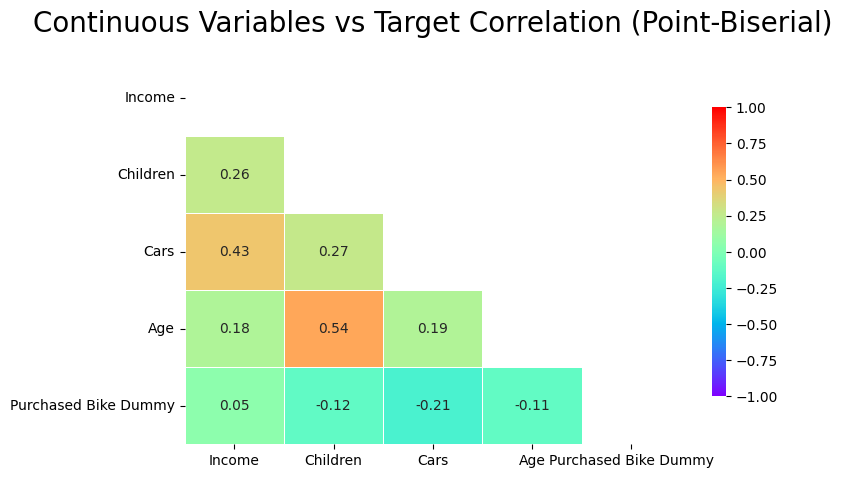

In [109]:
#Making Bi-Serial Correlation Heatmap
def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(df[x], df[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = df[feats_].columns, index =df[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette('rainbow', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous Variables vs Target Correlation (Point-Biserial)", fontsize=20, y= 1.05);

#### Cramer's V Correlation Heatmap
The Cramér's V correlation coefficients between the target variable, Purchased Bike Dummy, and the category variables are displayed in the heatmap above.  From 0 (no relationship) to 1 (perfect association), Cramér's V quantifies the degree of correlation between two categorical variables.

 Overall, there are weak to moderate correlations between categorical variables and bike buying behavior, indicating that each of these traits may only have a little role in predicting bike purchases.  The variable that has the largest correlation with the Purchased Bike Dummy is Commute Distance (V = 0.19). This suggests that commute distance may have a minor but significant impact on whether or not someone purchases a bike, perhaps because shorter commutes make riding a bike more feasible.  While occupation (V = 0.07), marital status (V = 0.10), and home ownership (V = 0.10) indicate very modest links with the chance of buying a bike, education (V = 0.15) and region (V = 0.11) also show slight relationships.  The fact that gender (V = 0) seems to have almost little association with bike purchases suggests that gender has no bearing on bike-buying behavior in this dataset.

 Region and Occupation (V = 0.44) and Region and Commute Distance (V = 0.29) exhibit moderate relationships within the categorical predictors themselves, suggesting some interdependence—for instance, certain commute patterns or occupations may be more prevalent in particular regions.  Given that homeowners are more likely to be married, there is also a moderate correlation between property ownership and marital status (V = 0.32).

 In conclusion, the Cramér's V analysis indicates that although no categorical feature significantly influences bike purchases, the most obvious correlations are found between variables like commute distance, education, and area.  The notion that lifestyle and regional characteristics may be more predictive of bike purchasing behavior than demographic variables like gender or marital status is supported by these results, which are consistent with previous findings.

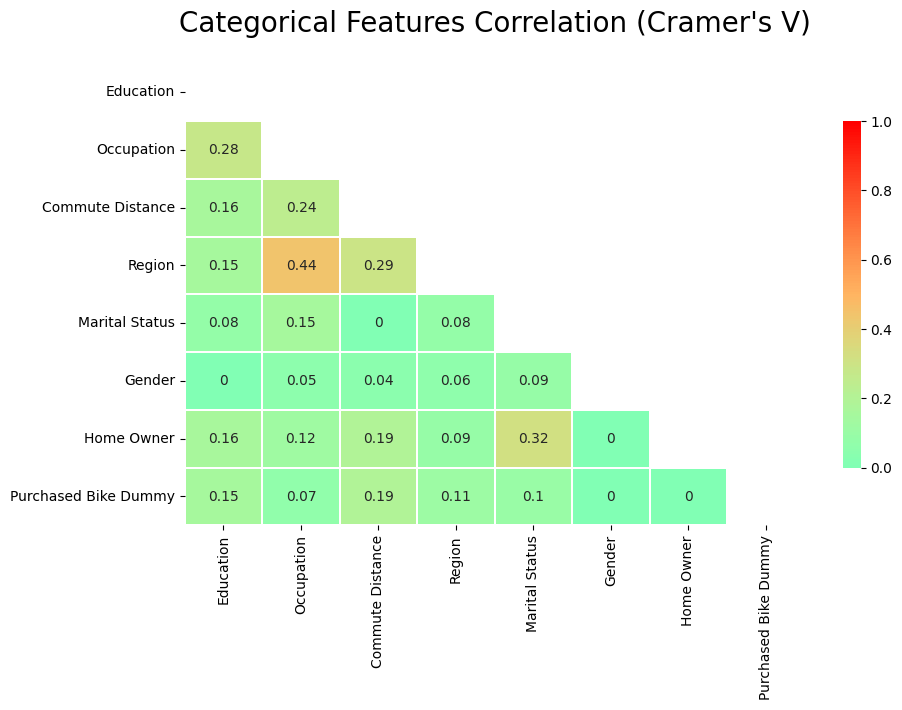

In [110]:
#Making Cramer's V Correlation Heatmap
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = df[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette('rainbow', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);